# Preliminary Findings and Hypotheses Sprint Journal for Runjini Murthy

## Part 1 (Week 1): Pair EDA and Concept Demonstration

### 1. Exploratory Data Analysis Concepts to use or test on this project
concepts, definitions, why you are interested or think they will be useful. These are the concepts you will illustrate in the sections below. Recommend selecting 3-5, but choose as many as you think you can explore comprehensively.

### 2. Professionally Relevant Datasets
Find a dataset that would be useful for you to become more familiar with professionally. Can identify multiple (max 3 recommended):
1. Facebook campaign data
2. AdWords data
3. Email marketing data
4. Website traffic data

### 3. EDA Steps for your partner to explore your dataset(s)
The first part of this sprint project will be to trade datasets with a partner. The idea for the exercise is to think about what you think might be interesting about a dataset and create an EDA plan to explore it. Except the first pass will be for your partner to carry out your EDA plan and report back to you with preliminary findings.

Create a new Jupyter notebook (python or R) that loads your dataset and includes cells for the steps you want your partner to take and empty cells for the code to complete them as well as empty cells where preliminary findings should go.

### 4. Carrying out your Partner's EDA Steps
Scripts for Michael and Tori in folder.

### 5. Applying your EDA Concepts (step 1) to your partner's dataset. 
Concepts to review:
1. Multivariate
2. *Distribution / Histogram*
3. Central Tendency
4. *Kurtosis*
5. Stem and leaf
6. *Box plot*
7. *Correlation*
8. Covariance
9. *Scatter plot*
10. Clustering
11. Factor analysis

### Miscellaneous Links
Date conversion: https://www.displayr.com/r-date-conversion/

How to remove NA: https://stackoverflow.com/questions/11254524/omit-rows-containing-specific-column-of-na [Used: subset(DF, !is.na(y))]

Aggregate function: https://stackoverflow.com/questions/4104406/calculating-subtotals-in-r


## Part 2 (Week 2): EDA of your Dataset
Walk through a polished Exploratory Data Analysis exercise in your personal repo. This can include the steps that you laid out originally, any new steps and new ideas you have, or any new techniques you developed from the concepts in (5.) above. 

Your final deliverable repo should include a 
- 1.) readme and a script file OR
- 2.) a notebook 

that illustrates your analysis and leads to preliminary findings and hypotheses about the dataset for future investigation or more thorough analysis.

## Questions
1. I expect spend to be highly correlated/affect total results.
2. I expect that posts with more comments have the highest reactions.
3. I expect it is cheaper to get a reaction than to get a comment.

## EDA Process
1. Import data set
2. Observe number of rows and columns.
3. Run summary function to get snapshot of ranges of each variable/column.
4. Look for NA values and determine how to address them. (Do you completely replace them, or merely subset out data excluding them?)
5. Perform univariate analysis - histogram each variable.
6. Perform a scatterplot matrix using the pairs function to quickly observe patterns.
7. Use the "cor" function to determine which of the variables that seem to demonstrate closer correlations are actually valid.
8. Hone in on additional questions.

## Work for Wednesday
1. Streamline script file.
2. Come up with clean, easy EDA outline.
3. Put a narrative around Facebook project.  What were results from initial raw data?  Why the four ad types?  What do those correlations show?
4. Pull together Powerpoint slides for Thursday.

In [3]:
# Load up necessary packages
library(readr)
require(devtools)
install_github("Displayr/flipTime")
library(flipTime)

# Import data file
aalii_facebook <- read_csv("Aalii-Campaigns-Dec-15-2017-Feb-4-2018.csv")

Loading required package: devtools
Skipping install of 'flipTime' from a github remote, the SHA1 (76aedf01) has not changed since last install.
  Use `force = TRUE` to force installation
Parsed with column specification:
cols(
  reporting_start = col_character(),
  reporting_end = col_character(),
  campaign_name = col_character(),
  delivery = col_character(),
  results = col_integer(),
  result_indicator = col_character(),
  reach = col_integer(),
  impressions = col_integer(),
  cost_per_result = col_double(),
  amount_spent = col_double(),
  end_date = col_character(),
  frequency = col_double(),
  link_clicks = col_integer(),
  button_clicks = col_integer(),
  comments = col_integer(),
  reactions = col_integer(),
  shares = col_integer(),
  engagement = col_integer()
)


In [4]:
# Clean up data set
aalii_facebook$reporting_start <- AsDate(aalii_facebook$reporting_start)
aalii_facebook$reporting_end <- AsDate(aalii_facebook$reporting_end)
aalii_facebook$end_date <- AsDate(aalii_facebook$end_date)

# Remove NA values
# facebook <- na.omit(aalii_facebook) -- DO NOT USE.  This removes rows with ANY NA values, but in validating reach numbers, I saw that it removed the true maximum because there were no comments on that post.  
# facebook <- subset(aalii_facebook, !is.na(results)) -- DO NOT USE I used NA from the "results" column to remove NAs from the data set. When I re-did the sum for the amount spent on this subset, the result was lower than when I looked at the whole set.  Further review showed I was leaving off some campaigns where we did spend money but there were no results.  I realized I can't subset off of NA; it'll have to be where the reach is greater than 0.
facebook <- subset (aalii_facebook, aalii_facebook$reach > 0)  #Working subset is now those where reach is greater than 0.  There will be NAs, but those are okay to keep in the data set.

In [5]:
head(facebook)

Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3

reporting_start,reporting_end,campaign_name,delivery,results,result_indicator,reach,impressions,cost_per_result,amount_spent,end_date,frequency,link_clicks,button_clicks,comments,reactions,shares,engagement
2018-02-04,2018-02-04,"Post: ""Honolulu<89>۪s art scene has never been more...""",active,274,actions:post_engagement,5436,5508,0.2004380,54.92,2018-02-05,1.013245,24,23,1,244,2,274
2018-02-04,2018-02-04,20180204-20180204 Lead Gen OO,active,7,actions:leadgen.other,4115,4431,14.0557143,98.39,2018-02-04,1.076792,71,0,NA,17,1,89
2018-02-03,2018-02-03,"Post: ""Honolulu<89>۪s art scene has never been more...""",active,545,actions:post_engagement,8288,8545,0.1768257,96.37,2018-02-05,1.031009,28,25,3,508,3,545
2018-02-02,2018-02-02,"Post: ""Honolulu<89>۪s art scene has never been more...""",active,631,actions:post_engagement,4974,5311,0.1449128,91.44,2018-02-05,1.067752,20,17,2,603,3,631
2018-02-02,2018-02-02,20180129-20180202 Lead Gen OO,recently_completed,11,actions:leadgen.other,3401,3527,8.6127273,94.74,2018-02-02,1.037048,76,0,NA,7,NA,84
2018-02-01,2018-02-01,20180129-20180202 Lead Gen OO,recently_completed,30,actions:leadgen.other,6920,7340,6.6806667,200.42,2018-02-02,1.060694,150,0,NA,25,NA,176


In [6]:
# The Basics
# How many variables/columns?
length(facebook)
# 18

# What are the unique Facebook campaigns in the data set?
unique(facebook$campaign_name)

# How much money was spent in total over the course of this data set?
sum(facebook$amount_spent)
# 16601.66

# What was the max amount of money spent?
max(facebook$amount_spent)
# 644.75

# What was the minimum amount spent?
min(facebook$amount_spent)
# 7.29

# What was the maximum reach recorded?
max(facebook$reach)
# 21263

# What was the minimum reach recorded?
min(facebook$reach)
#2255


[1] 18

[1] "Post: \"Honolulu\x89۪s art scene has never been more...\""       
 [2] "20180204-20180204 Lead Gen OO"                                    
 [3] "20180129-20180202 Lead Gen OO"                                    
 [4] "Post: \"From post-its to your iPhone, design is a part of...\""   
 [5] "20180122-20180127 Lead Gen OO"                                    
 [6] "Post: \"You\x89۪ve heard of smart homes, smart devices, and...\""
 [7] "20180117-20180123 Lead Gen Turnkey"                               
 [8] "Post: \"Who was Ossipoff and what is mid-century modern...\""     
 [9] "20180111-20180119 Lead Gen Private Lanai"                         
[10] "2018011-20180117 Traffic Private Lanai"                           
[11] "20180109-20180115 'A'ali'i Blog Retargeting"                      
[12] "Post: \"Names have power. Learn more about the origins of...\""   
[13] "20180109-20180111 Lead Gen Turnkey"                               
[14] "Post: \"Shaken, not stirred: Bar Leather Apron provides...\""     
[15] "20171215-20180103 Lead Gen Turnkey"                               
[16] "20171228-20180103 Traffic Homefinder"                             
[17] "20171221-20171231 'A'ali'i Blog Retargeting"                      
[18] "Post: \"Catch a movie, take a free yoga class or meet up...\""    
[19] "Post: \"From Nobu to Piggy Smalls, find some of...\""             
[20] "20171215-20171222 Traffic Rottet"                                 
[21] "20171215-20171222 Traffic Turnkey"

[1] 16601.66

[1] 644.75

[1] 7.29

[1] 21263

[1] 333

In [7]:
# Practice plots -- NOT SURE HOW TO USE YET
ggplot(facebook, aes(reach, engagement)) + geom_point()

ggplot(facebook, aes(amount_spent, engagement)) + geom_point()

ggplot(facebook) + geom_bar(aes(x=reporting_start,y=engagement),stat="summary", fun.y = "sum",fill=I("grey50"))

# Trying to repurpose this graph: http://ggplot.yhathq.com/; not working
ggplot(facebook, aes(x='amount_spent', y='clicks', color='campaign_name')) +
  geom_point() +
  scale_color_brewer(type='diverging', palette=3) +
  xlab("Reach") + ylab("Clicks") + ggtitle("Facebook_Campaigns")

ERROR: Error in ggplot(facebook, aes(reach, engagement)): could not find function "ggplot"


# Key Concepts

## Histogram and Distribution
*Explanation of this concept relative to your data set here *

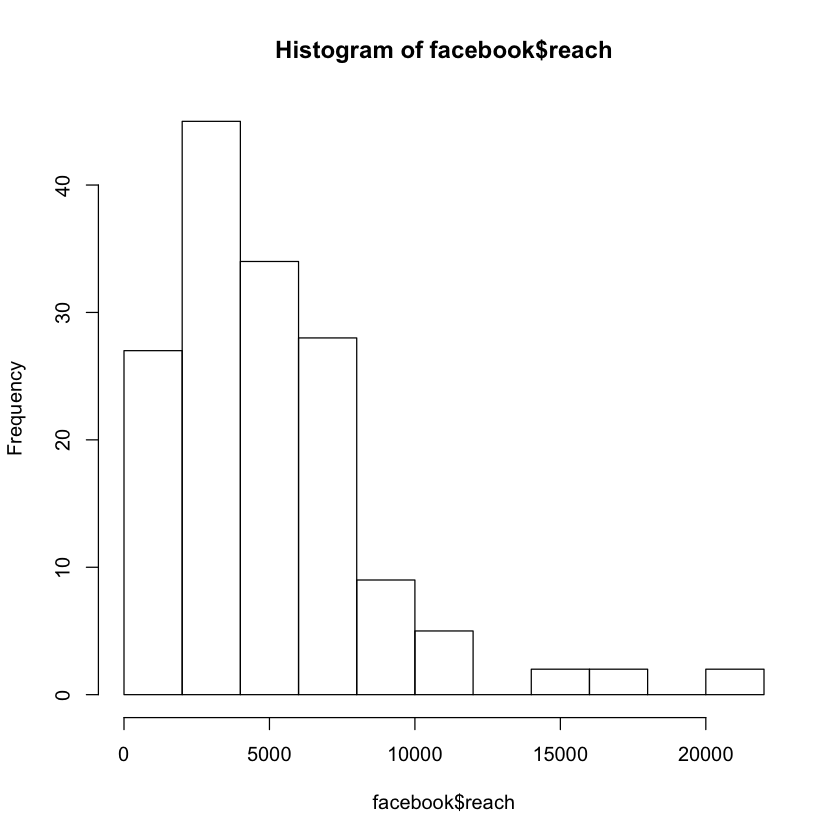

In [8]:
# Look at single variable distributions using histogram function
hist(facebook$reach)

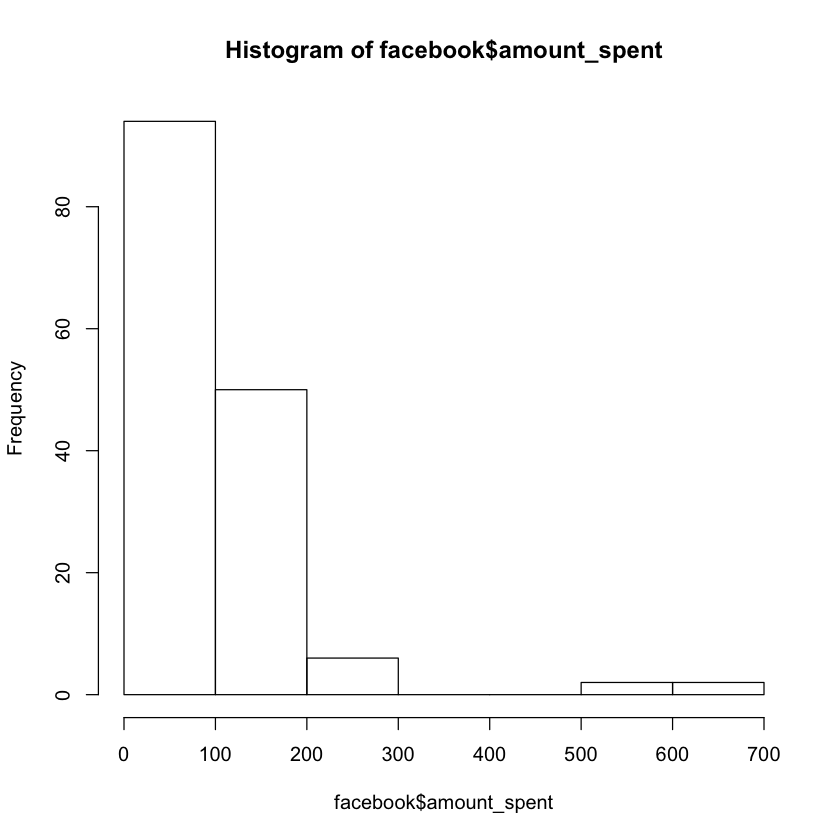

In [9]:
hist(facebook$amount_spent)

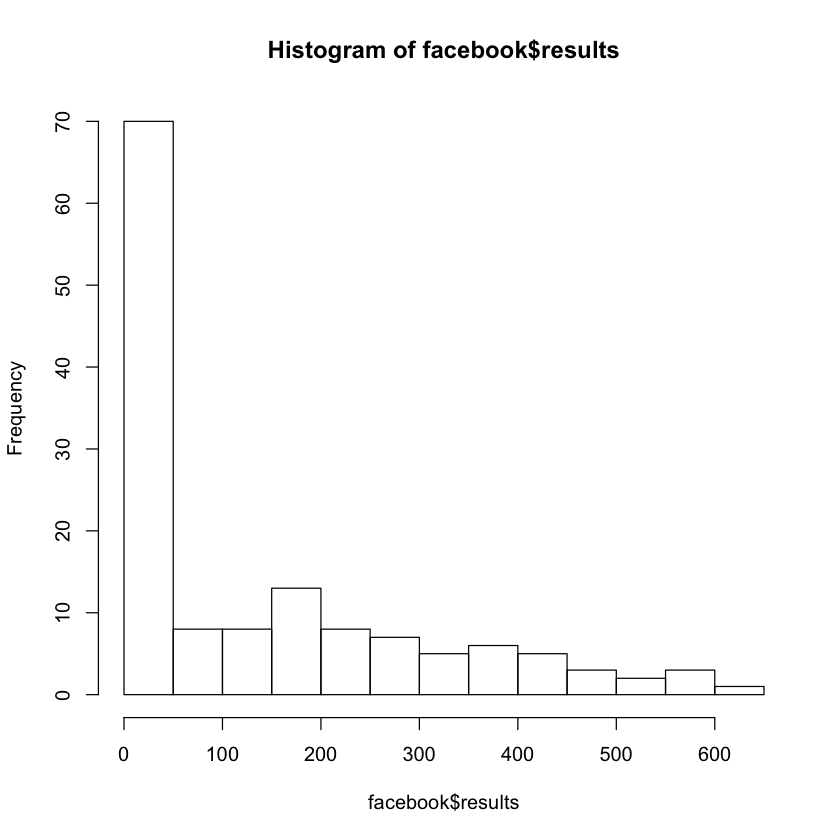

In [10]:
hist(facebook$results)

## Scatter plots
*Explanation of this concept relative to your data set here *

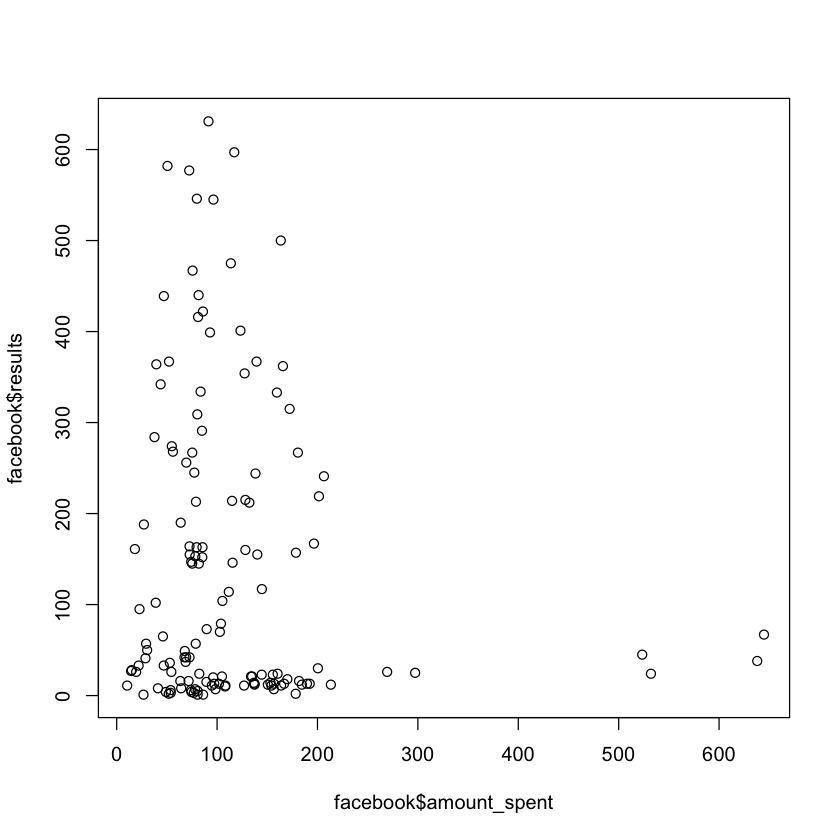

In [11]:
# Scatter plots
plot(facebook$amount_spent, facebook$results)

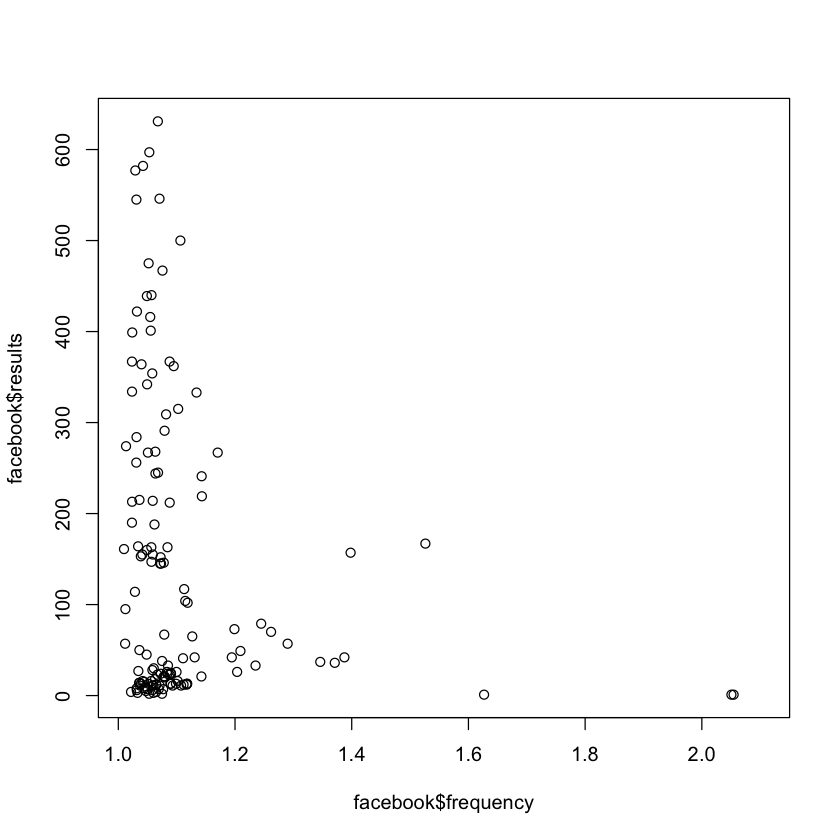

In [12]:
plot(facebook$frequency, facebook$results)

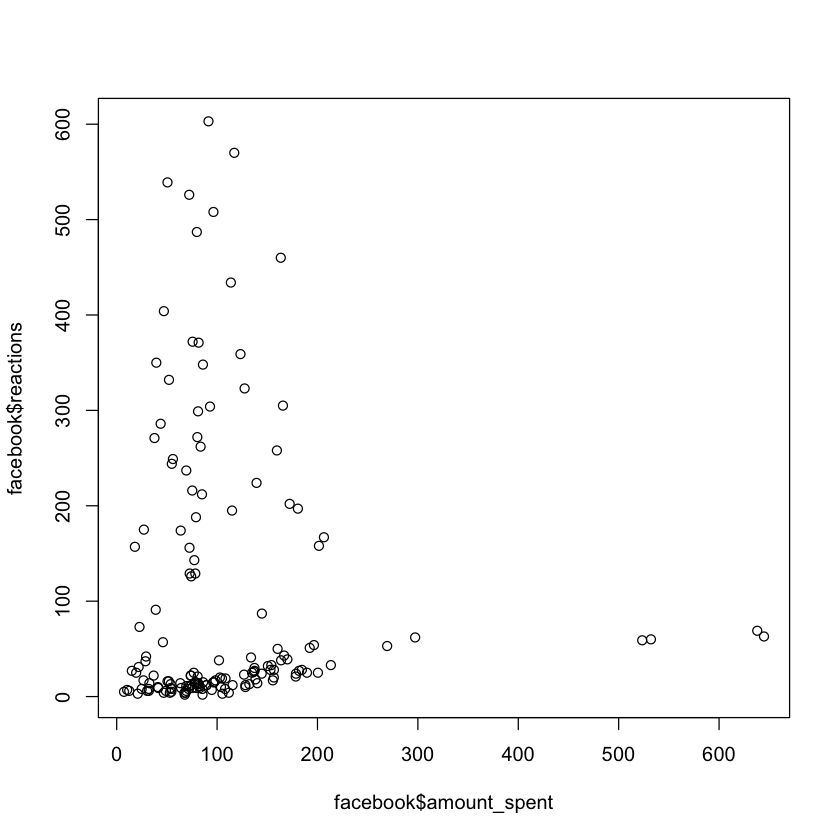

In [13]:
plot(facebook$amount_spent, facebook$reactions)

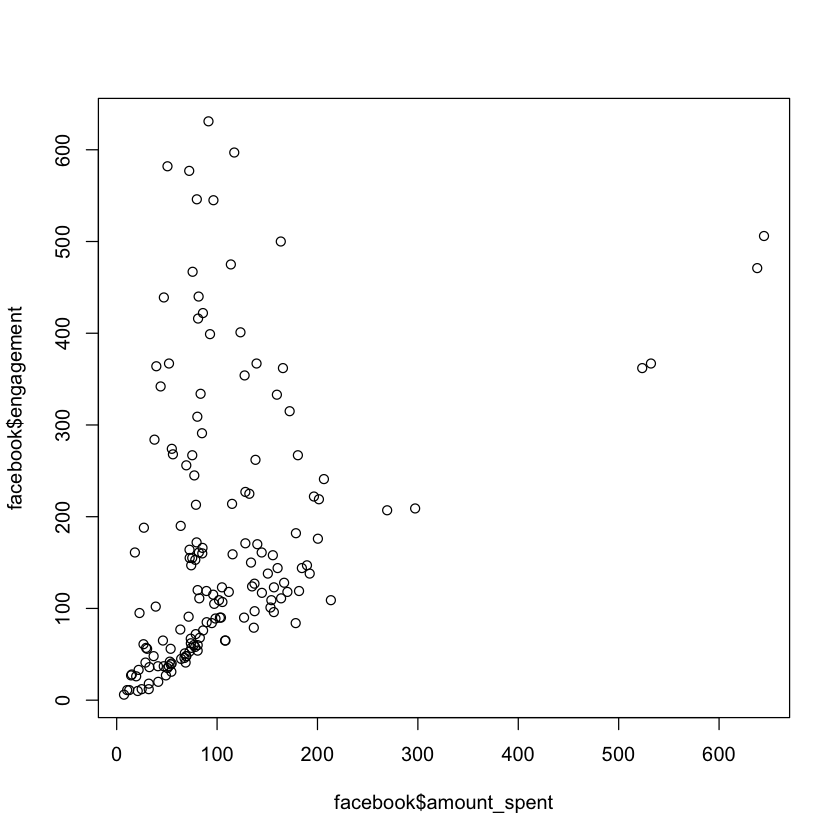

In [14]:
plot(facebook$amount_spent, facebook$engagement)

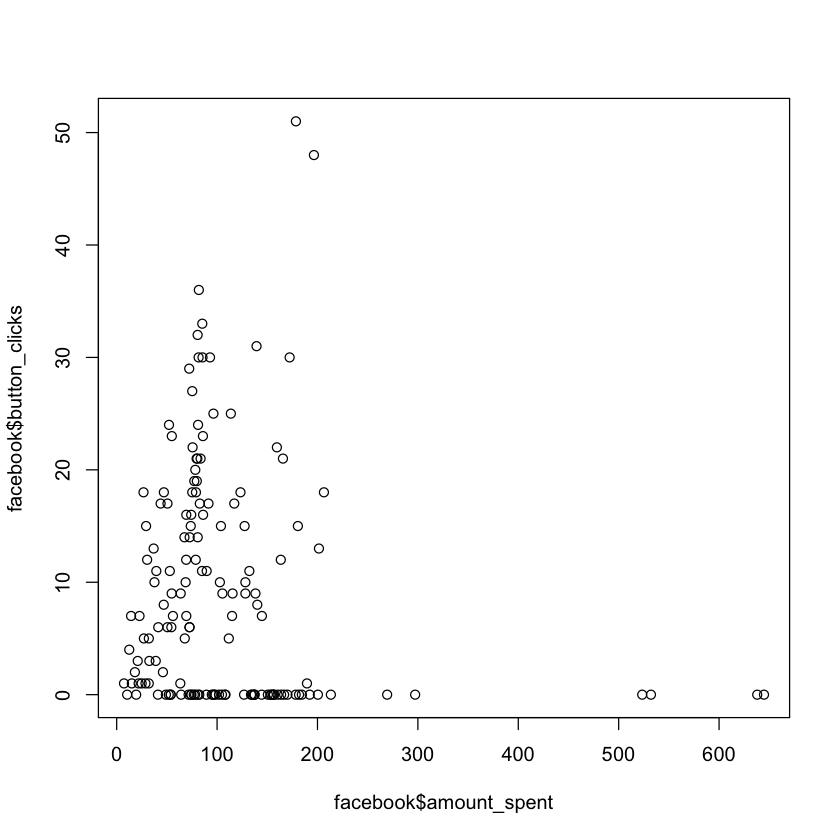

In [15]:
plot(facebook$amount_spent, facebook$button_clicks)

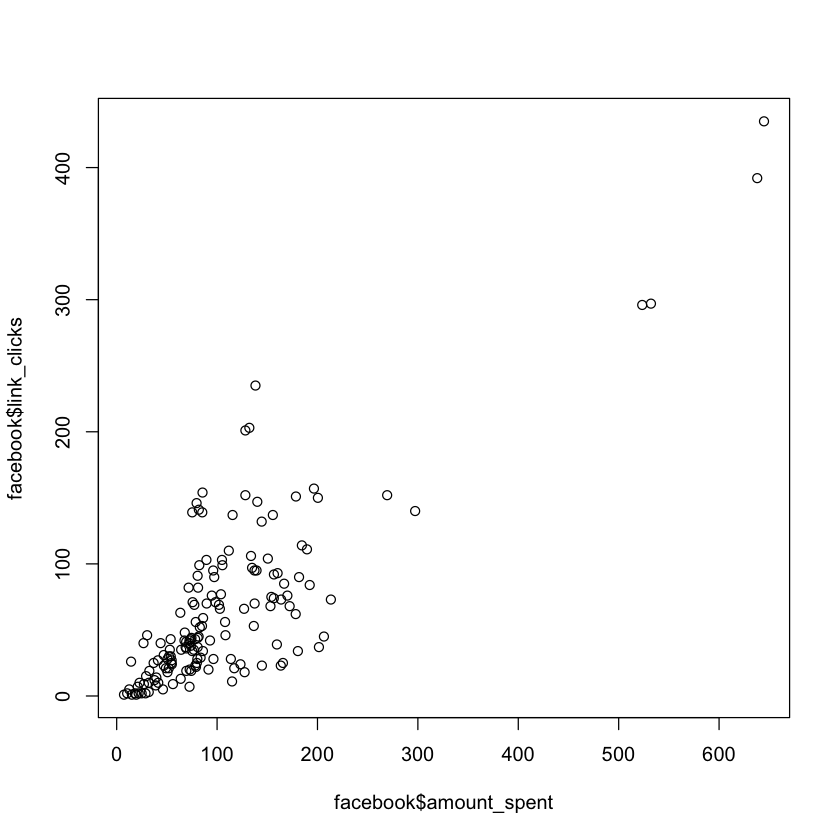

In [16]:
plot(facebook$amount_spent, facebook$link_clicks)

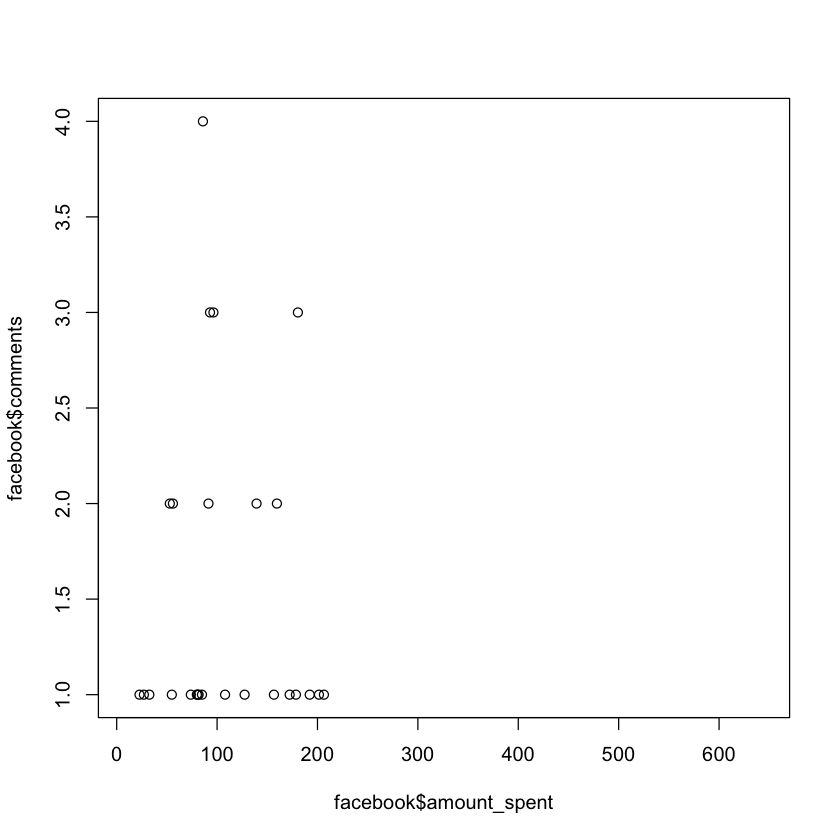

In [17]:
plot(facebook$amount_spent, facebook$comments) # no correlation?

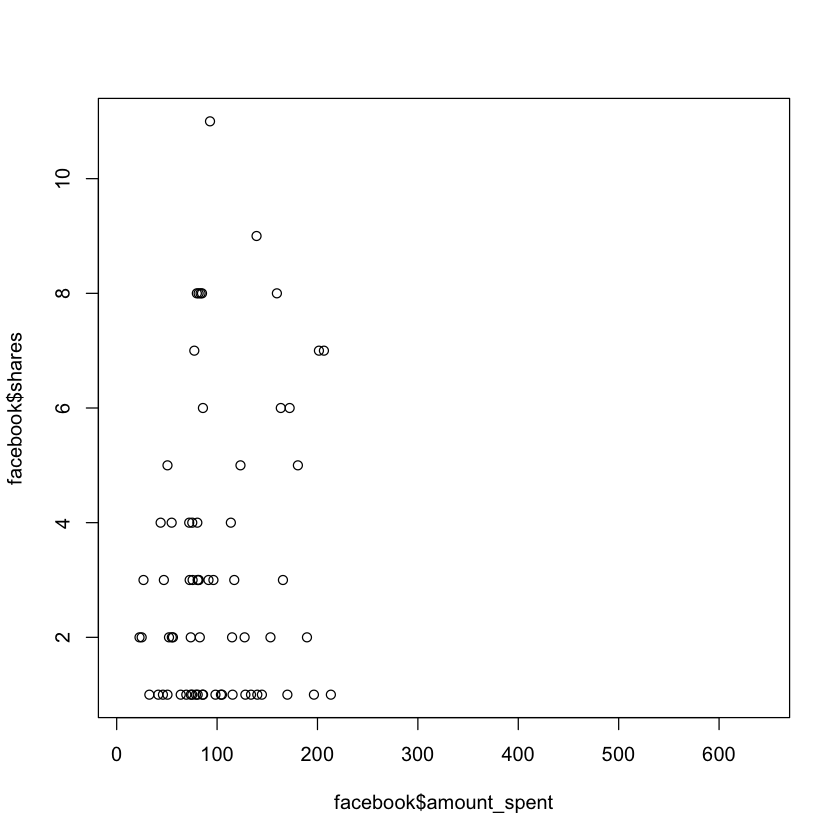

In [18]:
plot(facebook$amount_spent, facebook$shares) # no correlation?

## Kurtosis
Definition from Investopedia: Kurtosis is a measure of the combined weight of a distribution's tails relative to the rest of the distribution. When a set of data is graphically depicted, it usually has a standard normal distribution, like a bell curve, with a central peak and thin tails. However, when kurtosis is present, the tails of the distribution are different than they would be under a normal bell-curved distribution.

There are three types of kurtosis:
Mesokurtic: Like a bell curve, but with fatter tails and a lower peak
Leptokurtic: Very thick tails and a tall/skinny peak [lepto = skinny]
Platykurtic: Slender tails and a lower peak [platy = broad]

(https://www.investopedia.com/terms/k/kurtosis.asp#ixzz56V4fqaEE)


## Box Plot
*Explanation of this concept relative to your data set here *

(https://www.statmethods.net/graphs/boxplot.html)

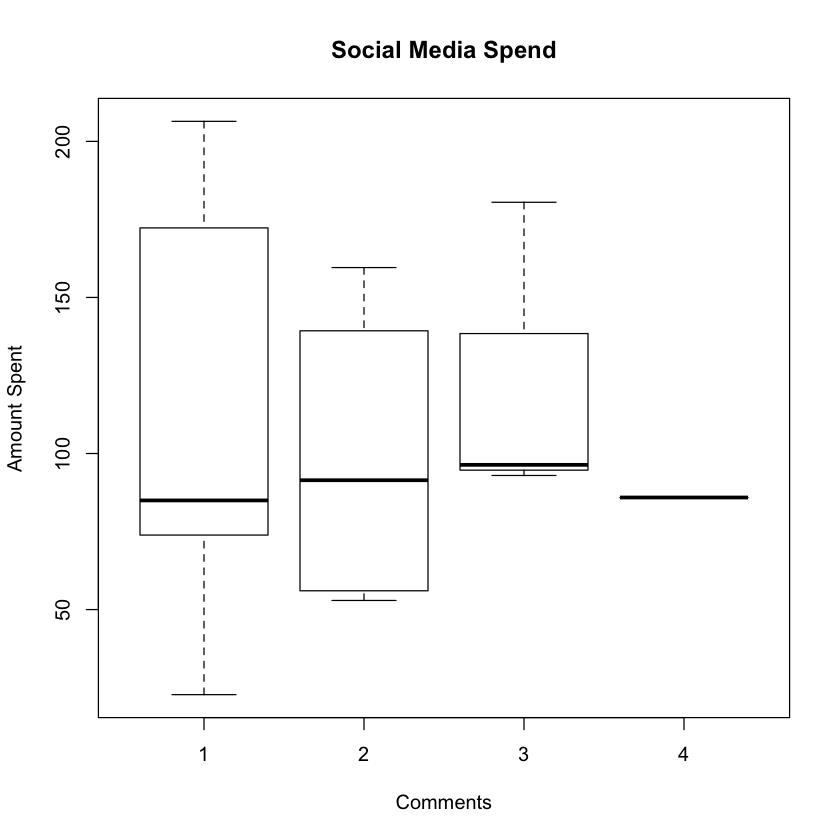

In [19]:
boxplot(amount_spent~comments,data=facebook, main="Social Media Spend", xlab="Comments", ylab="Amount Spent")

Warning message in axis(side = 1, at = 1:21, labels = c("20171215-20171222 Traffic Rottet", :
“conversion failure on 'Post: "Honolulu<89>۪s art scene has never been more..."' in 'mbcsToSbcs': dot substituted for <89>”Warning message in axis(side = 1, at = 1:21, labels = c("20171215-20171222 Traffic Rottet", :
“conversion failure on 'Post: "Honolulu<89>۪s art scene has never been more..."' in 'mbcsToSbcs': dot substituted for <db>”Warning message in axis(side = 1, at = 1:21, labels = c("20171215-20171222 Traffic Rottet", :
“conversion failure on 'Post: "Honolulu<89>۪s art scene has never been more..."' in 'mbcsToSbcs': dot substituted for <aa>”Warning message in axis(side = 1, at = 1:21, labels = c("20171215-20171222 Traffic Rottet", :
“conversion failure on 'Post: "You<89>۪ve heard of smart homes, smart devices, and..."' in 'mbcsToSbcs': dot substituted for <89>”Warning message in axis(side = 1, at = 1:21, labels = c("20171215-20171222 Traffic Rottet", :
“conversion failure on 'Post: "

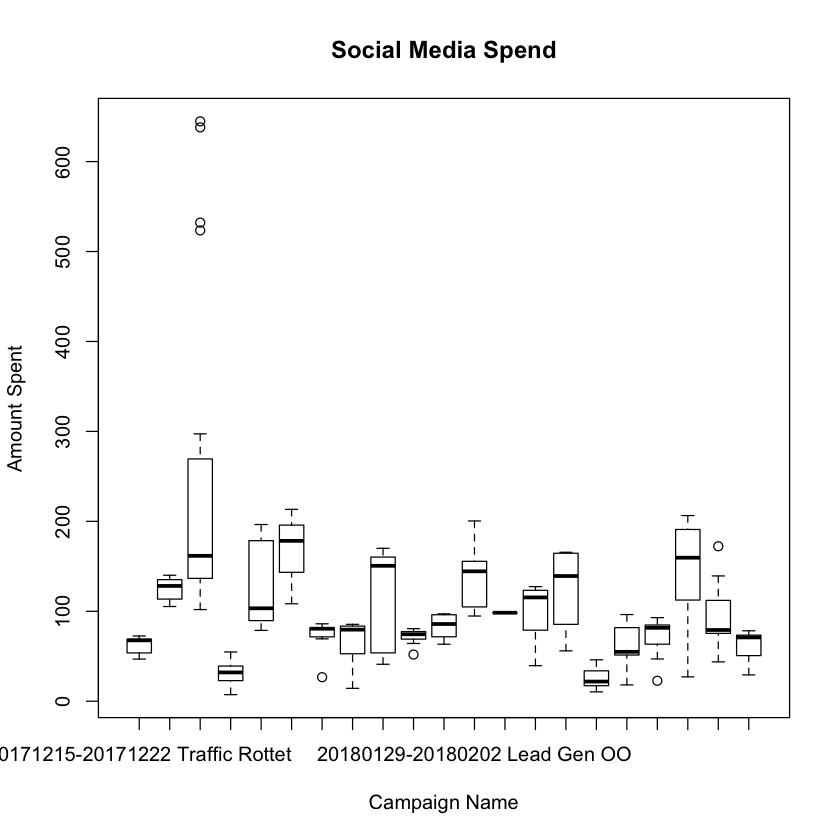

In [20]:
boxplot(amount_spent~campaign_name,data=facebook, main="Social Media Spend", xlab="Campaign Name", ylab="Amount Spent")

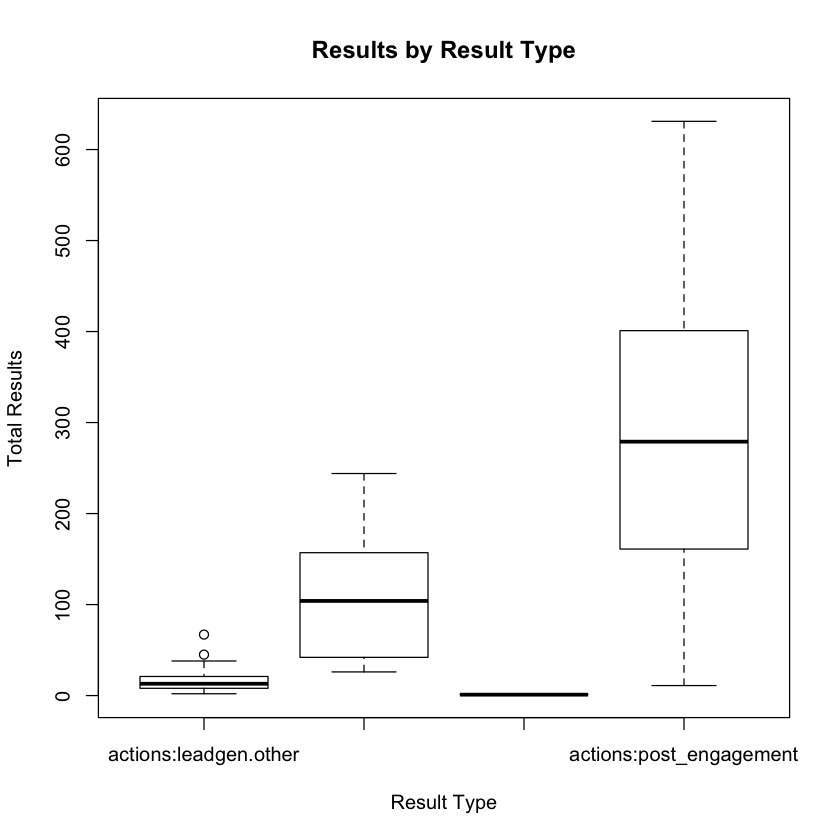

In [21]:
boxplot(results~result_indicator,data=facebook, main="Results by Result Type", xlab="Result Type", ylab="Total Results")

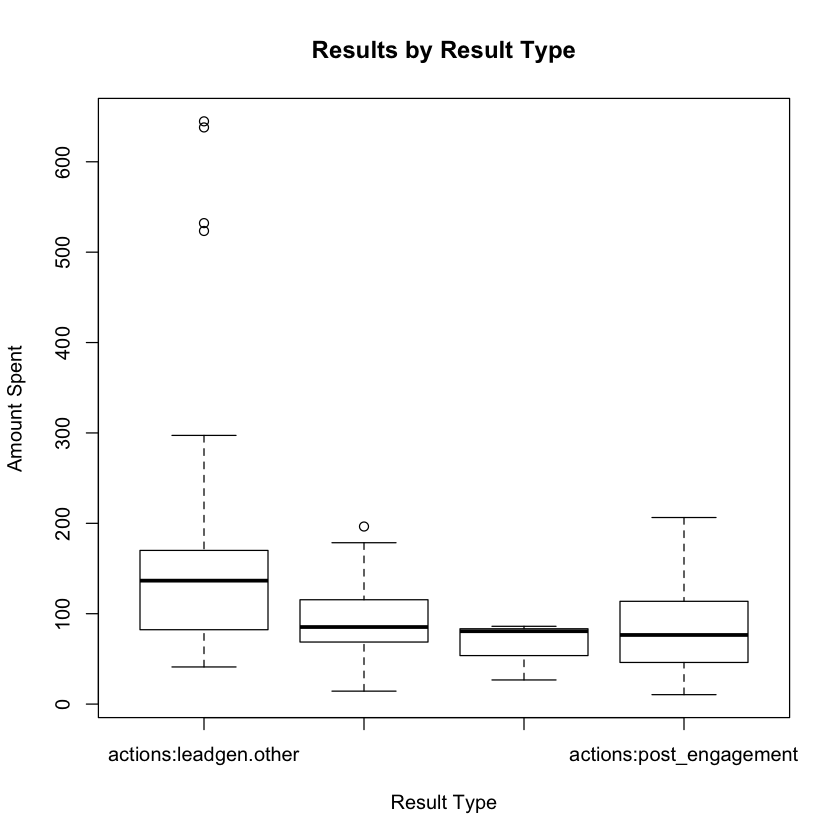

In [22]:
boxplot(amount_spent~result_indicator,data=facebook, main="Results by Result Type", xlab="Result Type", ylab="Amount Spent")

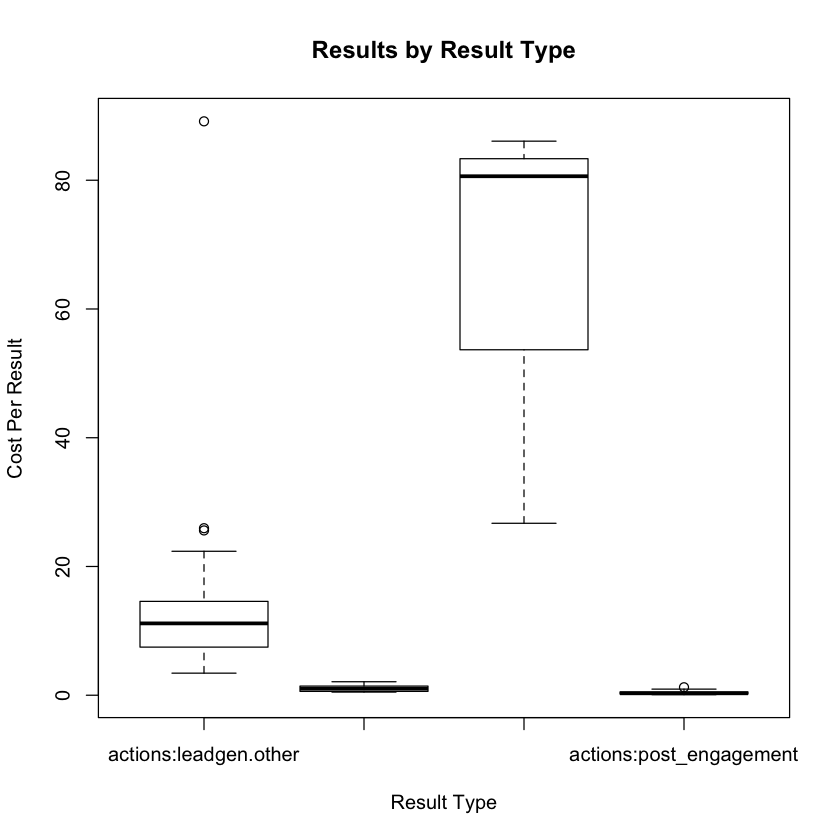

In [138]:
boxplot(cost_per_result~result_indicator,data=facebook, main="Results by Result Type", xlab="Result Type", ylab="Cost Per Result")

## Correlation
Correlation Coefficient

If the correlation coefficient is close to 1, it would indicate that the variables are positively linearly related and the scatter plot falls almost along a straight line with positive slope. For -1, it indicates that the variables are negatively linearly related and the scatter plot almost falls along a straight line with negative slope. And for zero, it would indicate a weak linear relationship between the variables.

(http://www.r-tutor.com/elementary-statistics/numerical-measures/correlation-coefficient)

QUESTION: How do you run correlation calculations with NA values present in certain rows?

In [139]:
amount_spent = facebook$amount_spent  # amount spent for FB ads
reach = facebook$reach                # the number of unique people reached by FB ads 
cor(amount_spent, reach)              # apply the cor function 

[1] 0.8489755

## Correlation with subtotaled figures

In [140]:
fb_spend_subtotal <- aggregate(facebook$amount_spent, by=list(facebook$reporting_start), FUN=sum, na.rm = TRUE)
fb_spend_subtotal$date <- fb_spend_subtotal$Group.1
fb_spend_subtotal$spend <- fb_spend_subtotal$x
fb_spend_subtotal = subset(fb_spend_subtotal, select = -c(Group.1, x) )

In [141]:
# Now, date and results.
fb_results_subtotal <- aggregate(facebook$results, by=list(facebook$reporting_start), FUN=sum, na.rm = TRUE)
fb_results_subtotal$date <- fb_results_subtotal$Group.1
fb_results_subtotal$results <- fb_results_subtotal$x
fb_results_subtotal = subset(fb_results_subtotal, select = -c(Group.1, x) )

In [23]:
# Combine table with date, spend, and results.
fb_spend_results <- merge(fb_spend_subtotal, fb_results_subtotal, by = "date")

# Plot 
plot(fb_spend_results$spend, fb_spend_results$results)

ERROR: Error in merge(fb_spend_subtotal, fb_results_subtotal, by = "date"): object 'fb_spend_subtotal' not found


In [24]:
# Correlation of spend and results.
amount_spent_sbt = fb_spend_results$spend 
results_sbt = fb_spend_results$results
cor(amount_spent_sbt, results_sbt)    

ERROR: Error in eval(expr, envir, enclos): object 'fb_spend_results' not found


In [25]:
# A new subtotal.  Subtotal results by campaign.  Start with campaign and spend.
fb_campaign_subtotal <- aggregate(facebook$amount_spent, by=list(facebook$campaign_name), FUN=sum, na.rm = TRUE)
fb_campaign_subtotal$campaign_name <- fb_campaign_subtotal$Group.1
fb_campaign_subtotal$spend <- fb_campaign_subtotal$x
fb_campaign_subtotal = subset(fb_campaign_subtotal, select = -c(Group.1, x) )

# Now, campaign and results.
fb_campaign_results_subtotal <- aggregate(facebook$results, by=list(facebook$campaign_name), FUN=sum, na.rm = TRUE)
fb_campaign_results_subtotal$campaign_name <- fb_campaign_results_subtotal$Group.1
fb_campaign_results_subtotal$results <- fb_campaign_results_subtotal$x
fb_campaign_results_subtotal = subset(fb_campaign_results_subtotal, select = -c(Group.1, x) )

# Combine table with campaign name, spend, and results.
fb_campaign_results <- merge(fb_campaign_subtotal, fb_campaign_results_subtotal, by = "campaign_name")

# Add a cost per result column.
library(dplyr)
fb_campaign_results <- fb_campaign_results %>% mutate(cost_per_result = spend/results)
head(fb_campaign_results)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



campaign_name,spend,results,cost_per_result
20171215-20171222 Traffic Rottet,500.00,307,1.6286645
20171215-20171222 Traffic Turnkey,999.25,1350,0.7401852
20171215-20180103 Lead Gen Turnkey,5300.00,439,12.0728929
20171221-20171231 'A'ali'i Blog Retargeting,345.71,0,Inf
20171228-20180103 Traffic Homefinder,750.00,603,1.2437811
20180109-20180111 Lead Gen Turnkey,500.00,25,20.0000000


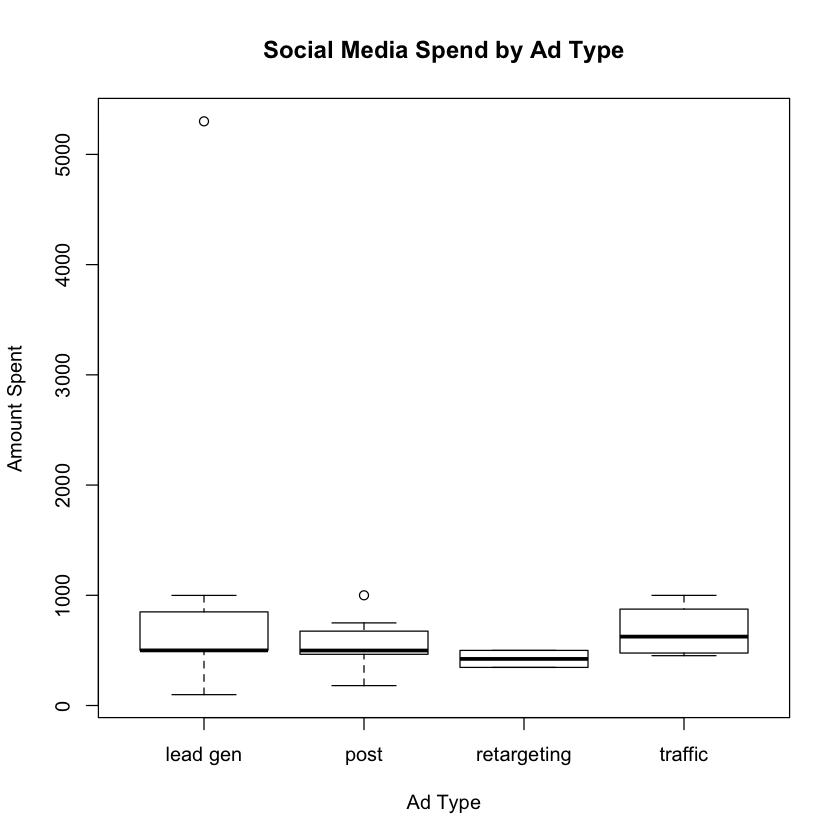

In [26]:
# Manually add the ad type. This is not ideal; would have liked to have used a string match to assign a value into a new column.
fb_campaign_results <- data.frame(fb_campaign_results, ad_type = c("traffic", "traffic", "lead gen", "retargeting", "traffic","lead gen", "retargeting", "traffic", "lead gen", "lead gen", "lead gen", "lead gen", "lead gen", "post", "post", "post", "post", "post", "post", "post", "post"))

# Box plot this new table
boxplot(spend~ad_type,data=fb_campaign_results, main="Social Media Spend by Ad Type", xlab="Ad Type", ylab="Amount Spent")


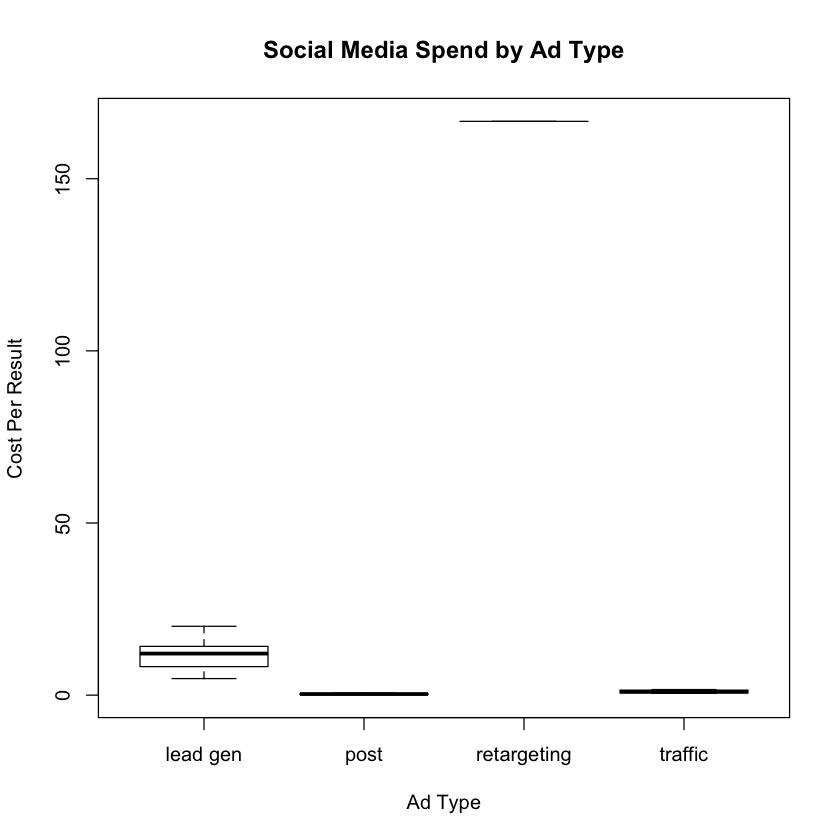

In [27]:
boxplot(cost_per_result~ad_type,data=fb_campaign_results, main="Social Media Spend by Ad Type", xlab="Ad Type", ylab="Cost Per Result")


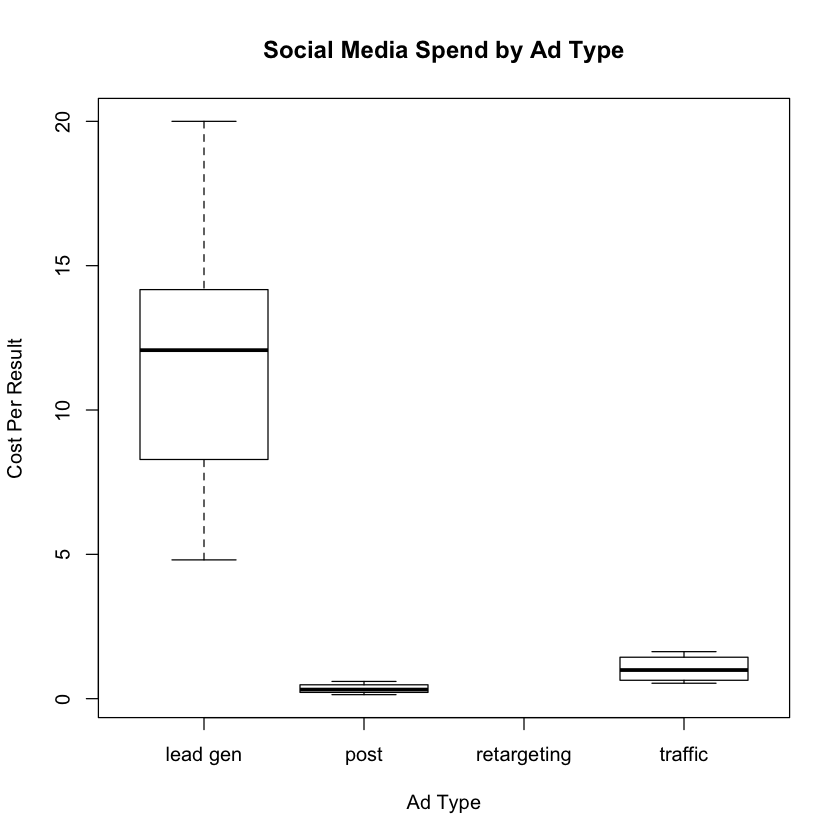

In [30]:
# Remove retargeting data as it is skewing the box plots
fb_campaign_results_noinf <- subset(fb_campaign_results, ad_type == "traffic" | ad_type == "lead gen" | ad_type == "post")
boxplot(cost_per_result~ad_type,data=fb_campaign_results_noinf, main="Social Media Spend by Ad Type", xlab="Ad Type", ylab="Cost Per Result")


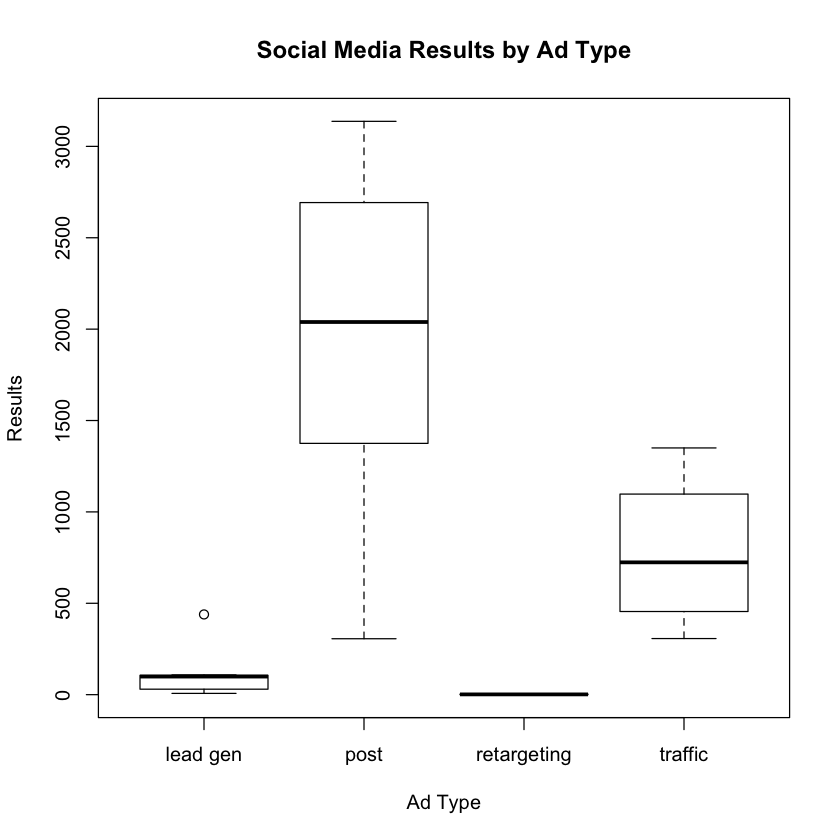

In [28]:
boxplot(results~ad_type,data=fb_campaign_results, main="Social Media Results by Ad Type", xlab="Ad Type", ylab="Results")

*The median amount spent is about the same for all four ad types.  When it come to results, the medians for post and traffic ads are much higher, and the range of values is much higher as well.  What does this mean?  We can get much more "engagement" for the same cost in a post ad, but this doesn't represent value, as the lead gen ads actually bring in new leads for us.  A future exploration is putting a value metric against these engagement numbers to see which type of ad has the highest actual ROI (revenue/spend).*

In [147]:
# Creating a working FB file to isolate values for scatter plot matrices.
working_fb <- subset(aalii_facebook, select=c("reporting_start", "campaign_name", "results", "impressions", "amount_spent", "comments", "reactions", "shares", "link_clicks", "button_clicks" ))
working_fb <- subset(working_fb, working_fb$impressions > 0)

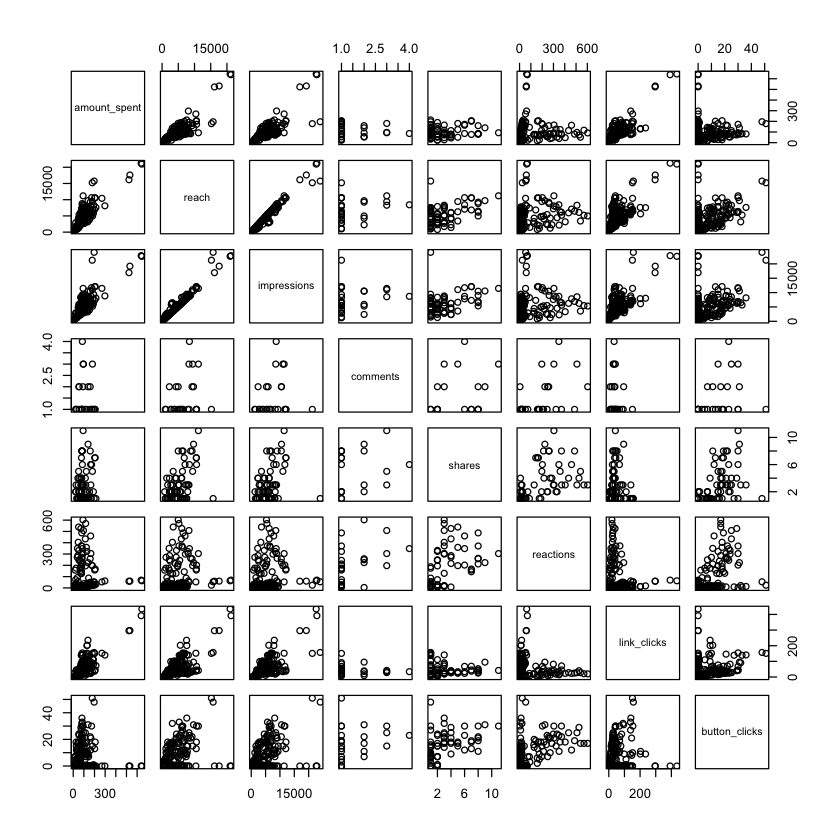

In [148]:
pairs(~amount_spent+reach+impressions+comments+shares+reactions+link_clicks+button_clicks,data=facebook)

In [149]:
head(facebook)

Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3

reporting_start,reporting_end,campaign_name,delivery,results,result_indicator,reach,impressions,cost_per_result,amount_spent,end_date,frequency,link_clicks,button_clicks,comments,reactions,shares,engagement
2018-02-04,2018-02-04,"Post: ""Honolulu<89>۪s art scene has never been more...""",active,274,actions:post_engagement,5436,5508,0.2004380,54.92,2018-02-05,1.013245,24,23,1,244,2,274
2018-02-04,2018-02-04,20180204-20180204 Lead Gen OO,active,7,actions:leadgen.other,4115,4431,14.0557143,98.39,2018-02-04,1.076792,71,0,NA,17,1,89
2018-02-03,2018-02-03,"Post: ""Honolulu<89>۪s art scene has never been more...""",active,545,actions:post_engagement,8288,8545,0.1768257,96.37,2018-02-05,1.031009,28,25,3,508,3,545
2018-02-02,2018-02-02,"Post: ""Honolulu<89>۪s art scene has never been more...""",active,631,actions:post_engagement,4974,5311,0.1449128,91.44,2018-02-05,1.067752,20,17,2,603,3,631
2018-02-02,2018-02-02,20180129-20180202 Lead Gen OO,recently_completed,11,actions:leadgen.other,3401,3527,8.6127273,94.74,2018-02-02,1.037048,76,0,NA,7,NA,84
2018-02-01,2018-02-01,20180129-20180202 Lead Gen OO,recently_completed,30,actions:leadgen.other,6920,7340,6.6806667,200.42,2018-02-02,1.060694,150,0,NA,25,NA,176


In [150]:
# This scatter plot matrix shows a very tight relationship between reach and impressions.  Run a correlation coefficient.
reach = facebook$reach 
impressions = facebook$impressions
cor(reach, impressions)
# 0.9755584

# Additional correlations.  There seems to be a relationship between amount spent and link clicks and button clicks; what is the coefficient?
link_clicks = facebook$link_clicks
button_clicks = facebook$button_clicks
amount_spent = facebook$amount_spent
cor(amount_spent, link_clicks)
# 0.8226542
cor(amount_spent, button_clicks)
# -0.1193038  Interestingly, this is slightly negative.  So does this mean for every additional dollar spent, we see fewer button clicks?


[1] 0.9755584

[1] 0.8226542

[1] -0.1193038

In [151]:
# Created a function to replace NA.s
na.zero <- function (x) {
       x[is.na(x)] <- 0
       return(x)
   }

# Applied to columns necessary
facebook <- facebook %>% mutate(comments2 = na.zero(facebook$comments))
facebook <- facebook %>% mutate(reactions2 = na.zero(facebook$reactions))
facebook <- facebook %>% mutate(shares2 = na.zero(facebook$shares))


In [152]:
# Determine correlations for amount spent
link_clicks = facebook$link_clicks
button_clicks = facebook$button_clicks
amount_spent = facebook$amount_spent
comments = facebook$comments2
shares = facebook$shares2
reactions = facebook$reactions2

cor(amount_spent, comments)
# 0.002101048
cor(amount_spent, shares)
# -0.01752486
cor(amount_spent, reactions)
# -0.03279766
cor(amount_spent, link_clicks)
# 0.8226542
cor(amount_spent, button_clicks)
# -0.1193038

[1] 0.002101048

[1] -0.01752486

[1] -0.03279766

[1] 0.8226542

[1] -0.1193038

In [153]:
# Correlations with reach
cor(reach, comments)
# 0.2358698
cor(reach, shares)
# 0.2611463
cor(reach, reactions)
# 0.1547908
cor(reach, link_clicks)
# 0.7425644
cor(reach, button_clicks)
# 0.3021123

[1] 0.2358698

[1] 0.2611463

[1] 0.1547908

[1] 0.7425644

[1] 0.3021123

In [154]:
# Correlations with impressions
cor(impressions, comments)
# 0.2144426
cor(impressions, shares)
# 0.235015
cor(impressions, reactions)
# 0.09832474
cor(impressions, link_clicks)
# 0.706595
cor(impressions, button_clicks)
# 0.3707937 

[1] 0.2144426

[1] 0.235015

[1] 0.09832474

[1] 0.706595

[1] 0.3707937

*There appears to be a strong correlation between the link clicks and various other variables -- amount spent, impressions, reach.  Is it possible to say that spend/impressions/reach has a lesser impact on reactons, comments, shares, and button clicks?*

In [155]:
# Per Ben's comments, go back to original table and pull out the different ad types into four different raw tables.
library(stringr)
raw_traffic_ads <- facebook %>% 
  filter(str_detect(campaign_name, "Traffic"))

raw_post_ads <- facebook %>% 
  filter(str_detect(campaign_name, "Post"))

raw_retargeting_ads <- facebook %>% 
  filter(str_detect(campaign_name, "Retargeting"))

raw_lead_gen_ads <- facebook %>% 
  filter(str_detect(campaign_name, "Lead Gen"))

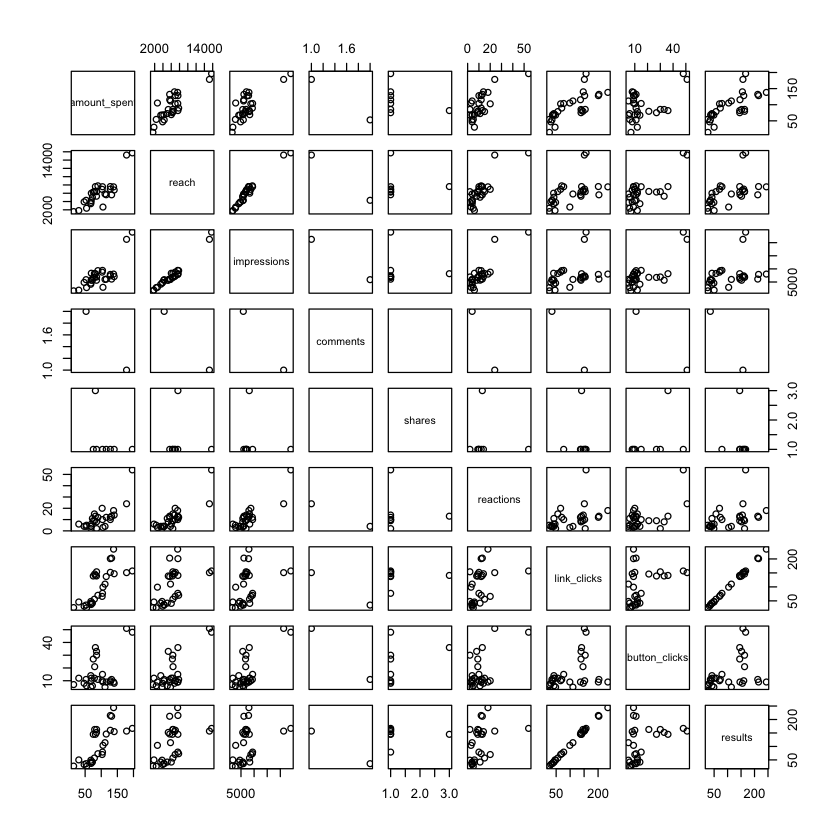

In [156]:
pairs(~amount_spent+reach+impressions+comments+shares+reactions+link_clicks+button_clicks+results,data=raw_traffic_ads)

In [157]:
# Correlations with impressions
cor(raw_traffic_ads$impressions, raw_traffic_ads$comments)
# 
cor(raw_traffic_ads$impressions, raw_traffic_ads$shares)
# 
cor(raw_traffic_ads$impressions, raw_traffic_ads$reactions)
# 
cor(raw_traffic_ads$impressions, raw_traffic_ads$link_clicks)
# 
cor(raw_traffic_ads$impressions, raw_traffic_ads$button_clicks)
# 

[1] NA

[1] NA

[1] NA

[1] 0.3818656

[1] 0.7423493

*NAs mean that I need to remove and replace NA values as above.*

In [158]:
# Use the remove NA function to the raw traffic ad table
raw_traffic_ads <- raw_traffic_ads %>% mutate(comments2 = na.zero(raw_traffic_ads$comments))
raw_traffic_ads <- raw_traffic_ads %>% mutate(reactions2 = na.zero(raw_traffic_ads$reactions))
raw_traffic_ads <- raw_traffic_ads %>% mutate(shares2 = na.zero(raw_traffic_ads$shares))
head(raw_traffic_ads)


reporting_start,reporting_end,campaign_name,delivery,results,result_indicator,reach,impressions,cost_per_result,amount_spent,⋯,frequency,link_clicks,button_clicks,comments,reactions,shares,engagement,comments2,reactions2,shares2
2018-01-17,2018-01-17,2018011-20180117 Traffic Private Lanai,inactive,27,actions:link_click,1572,1626,0.5307407,14.33,⋯,1.034351,26,7,NA,NA,NA,27,0,0,0
2018-01-16,2018-01-16,2018011-20180117 Traffic Private Lanai,inactive,145,actions:link_click,7611,8168,0.5643448,81.83,⋯,1.073184,141,36,NA,13,3,161,0,13,3
2018-01-15,2018-01-15,2018011-20180117 Traffic Private Lanai,inactive,163,actions:link_click,6432,6796,0.4883436,79.60,⋯,1.056592,146,21,NA,9,NA,172,0,9,0
2018-01-14,2018-01-14,2018011-20180117 Traffic Private Lanai,inactive,145,actions:link_click,6284,6735,0.5188966,75.24,⋯,1.071770,139,27,NA,9,1,155,0,9,1
2018-01-13,2018-01-13,2018011-20180117 Traffic Private Lanai,inactive,163,actions:link_click,6382,6920,0.5244785,85.49,⋯,1.084300,154,30,NA,2,1,166,0,2,1
2018-01-12,2018-01-12,2018011-20180117 Traffic Private Lanai,inactive,152,actions:link_click,5284,5667,0.5609211,85.26,⋯,1.072483,139,33,NA,8,NA,160,0,8,0


In [159]:
# Traffic correlations with impressions
cor(raw_traffic_ads$impressions, raw_traffic_ads$comments2)
# 0.204249479276347
cor(raw_traffic_ads$impressions, raw_traffic_ads$shares2)
# 0.212388047625502
cor(raw_traffic_ads$impressions, raw_traffic_ads$reactions2)
# 0.87131603273347
cor(raw_traffic_ads$impressions, raw_traffic_ads$link_clicks)
# 0.381865625477339
cor(raw_traffic_ads$impressions, raw_traffic_ads$button_clicks)
# 0.742349282007688

[1] 0.2042495

[1] 0.212388

[1] 0.871316

[1] 0.3818656

[1] 0.7423493

In [160]:
# Traffic correlations with amount spent
cor(raw_traffic_ads$amount_spent, raw_traffic_ads$comments2)
# 0.0105247073593458
cor(raw_traffic_ads$amount_spent, raw_traffic_ads$shares2)
# 0.207432666044528
cor(raw_traffic_ads$amount_spent, raw_traffic_ads$reactions2)
# 0.755042619882131
cor(raw_traffic_ads$amount_spent, raw_traffic_ads$link_clicks)
# 0.734050034179211
cor(raw_traffic_ads$amount_spent, raw_traffic_ads$button_clicks)
# 0.454315615414482

[1] 0.01052471

[1] 0.2074327

[1] 0.7550426

[1] 0.73405

[1] 0.4543156

In [161]:
# Traffic correlations with reach
cor(raw_traffic_ads$reach, raw_traffic_ads$comments2)
# 0.151983886207821
cor(raw_traffic_ads$reach, raw_traffic_ads$shares2)
# 0.290649623033146
cor(raw_traffic_ads$reach, raw_traffic_ads$reactions2)
# 0.844675810616946
cor(raw_traffic_ads$reach, raw_traffic_ads$link_clicks)
# 0.531210740500384
cor(raw_traffic_ads$reach, raw_traffic_ads$button_clicks)
# 0.733170196532378

[1] 0.1519839

[1] 0.2906496

[1] 0.8446758

[1] 0.5312107

[1] 0.7331702

#### For traffic ads, there appears to be a stronger correlation between spend/reach/impressions and reactions.

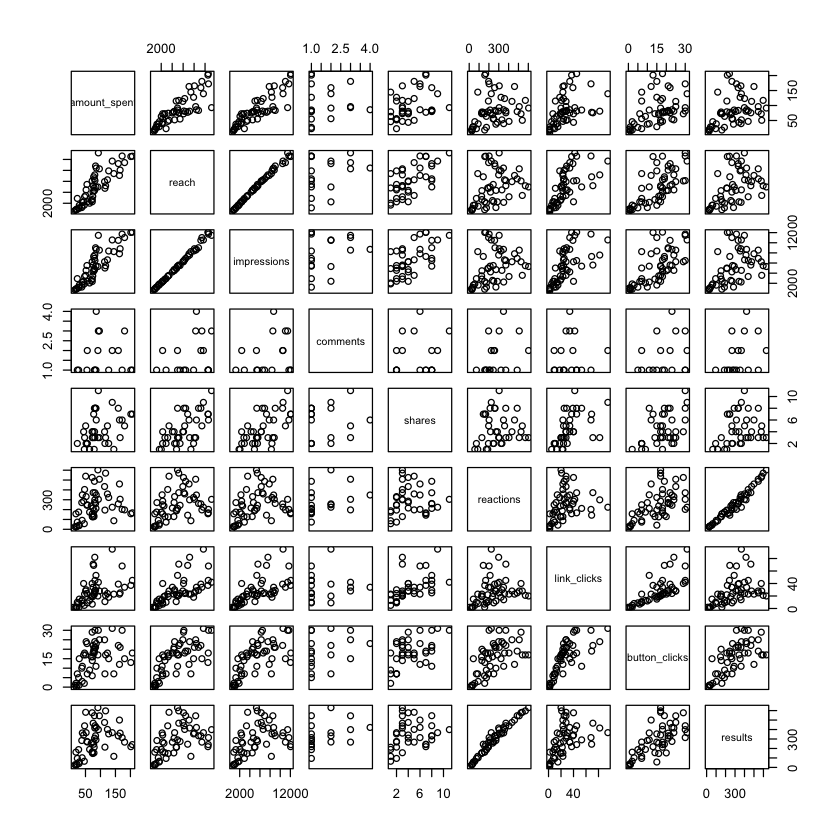

In [162]:
pairs(~amount_spent+reach+impressions+comments+shares+reactions+link_clicks+button_clicks+results,data=raw_post_ads)

In [163]:
# Use the remove NA function to the raw post ad table
raw_post_ads <- raw_post_ads %>% mutate(comments2 = na.zero(raw_post_ads$comments))
raw_post_ads <- raw_post_ads %>% mutate(reactions2 = na.zero(raw_post_ads$reactions))
raw_post_ads <- raw_post_ads %>% mutate(shares2 = na.zero(raw_post_ads$shares))
head(raw_post_ads)

reporting_start,reporting_end,campaign_name,delivery,results,result_indicator,reach,impressions,cost_per_result,amount_spent,⋯,frequency,link_clicks,button_clicks,comments,reactions,shares,engagement,comments2,reactions2,shares2
2018-02-04,2018-02-04,"Post: ""Honolulu<89>۪s art scene has never been more...""",active,274,actions:post_engagement,5436,5508,0.2004380,54.92,⋯,1.013245,24,23,1,244,2,274,1,244,2
2018-02-03,2018-02-03,"Post: ""Honolulu<89>۪s art scene has never been more...""",active,545,actions:post_engagement,8288,8545,0.1768257,96.37,⋯,1.031009,28,25,3,508,3,545,3,508,3
2018-02-02,2018-02-02,"Post: ""Honolulu<89>۪s art scene has never been more...""",active,631,actions:post_engagement,4974,5311,0.1449128,91.44,⋯,1.067752,20,17,2,603,3,631,2,603,3
2018-02-01,2018-02-01,"Post: ""Honolulu<89>۪s art scene has never been more...""",active,161,actions:post_engagement,821,829,0.1126708,18.14,⋯,1.009744,2,2,NA,157,NA,161,0,157,0
2018-02-01,2018-02-01,"Post: ""Honolulu<89>۪s art scene has never been more...""",inactive,367,actions:post_engagement,4445,4549,0.1419891,52.11,⋯,1.023397,30,24,NA,332,2,367,0,332,2
2018-01-31,2018-01-31,"Post: ""Honolulu<89>۪s art scene has never been more...""",inactive,577,actions:post_engagement,6072,6249,0.1251993,72.24,⋯,1.029150,40,29,NA,526,4,577,0,526,4


In [164]:
# Post correlations with impressions
cor(raw_post_ads$impressions, raw_post_ads$comments2)
# 0.533833792241916
cor(raw_post_ads$impressions, raw_post_ads$shares2)
# 0.777766218927342
cor(raw_post_ads$impressions, raw_post_ads$reactions2)
# 0.336750190011114
cor(raw_post_ads$impressions, raw_post_ads$link_clicks)
# 0.664242003967123
cor(raw_post_ads$impressions, raw_post_ads$button_clicks)
# 0.678765140426802

[1] 0.5338338

[1] 0.7777662

[1] 0.3367502

[1] 0.664242

[1] 0.6787651

In [165]:
# Post correlations with amount spent
cor(raw_post_ads$amount_spent, raw_post_ads$comments2)
# 0.328815068003756
cor(raw_post_ads$amount_spent, raw_post_ads$shares2)
# 0.576718044093557
cor(raw_post_ads$amount_spent, raw_post_ads$reactions2)
# 0.265027020334126
cor(raw_post_ads$amount_spent, raw_post_ads$link_clicks)
# 0.479119333470808
cor(raw_post_ads$amount_spent, raw_post_ads$button_clicks)
#0.459428486853626

[1] 0.3288151

[1] 0.576718

[1] 0.265027

[1] 0.4791193

[1] 0.4594285

In [166]:
# Post correlations with reach
cor(raw_post_ads$reach, raw_post_ads$comments2)
# 0.539720044157725
cor(raw_post_ads$reach, raw_post_ads$shares2)
# 0.785065048401612
cor(raw_post_ads$reach, raw_post_ads$reactions2)
# 0.363941192095872
cor(raw_post_ads$reach, raw_post_ads$link_clicks)
# 0.669768394121211
cor(raw_post_ads$reach, raw_post_ads$button_clicks)
# 0.709385779606613

[1] 0.53972

[1] 0.785065

[1] 0.3639412

[1] 0.6697684

[1] 0.7093858

#### When it comes to the post ads, correlations seem weaker than traffic ads.  Impressions/spend/reach seem most positively correlated to shares for post ad types.

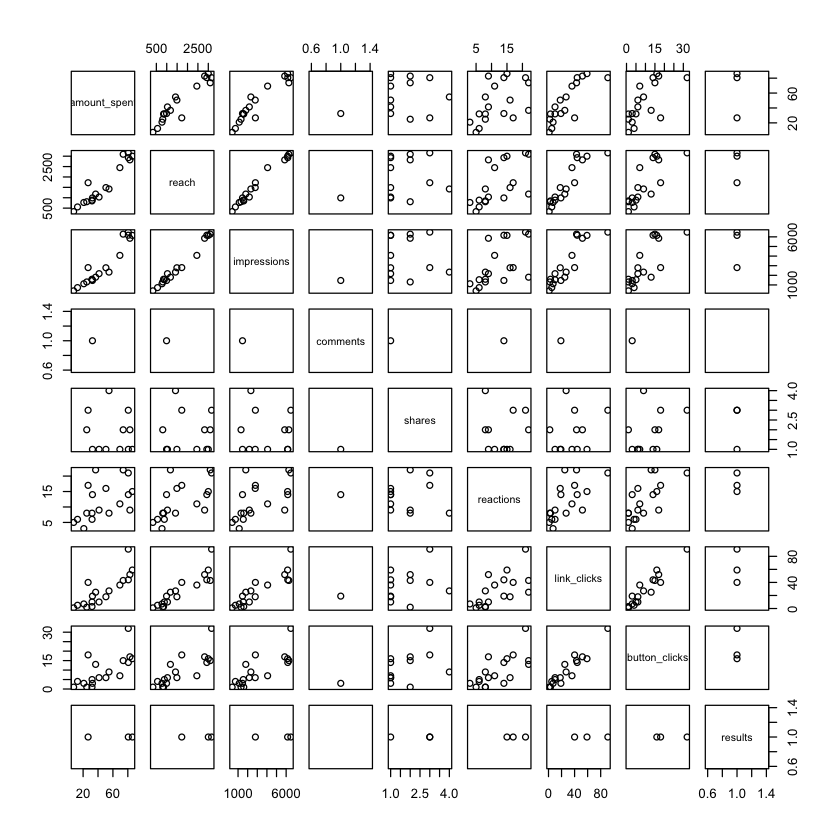

In [167]:
pairs(~amount_spent+reach+impressions+comments+shares+reactions+link_clicks+button_clicks+results,data=raw_retargeting_ads)

In [168]:
# Use the remove NA function to the raw retarget ad table
raw_retargeting_ads <- raw_retargeting_ads %>% mutate(comments2 = na.zero(raw_retargeting_ads$comments))
raw_retargeting_ads <- raw_retargeting_ads %>% mutate(reactions2 = na.zero(raw_retargeting_ads$reactions))
raw_retargeting_ads <- raw_retargeting_ads %>% mutate(shares2 = na.zero(raw_retargeting_ads$shares))
head(raw_retargeting_ads)

reporting_start,reporting_end,campaign_name,delivery,results,result_indicator,reach,impressions,cost_per_result,amount_spent,⋯,frequency,link_clicks,button_clicks,comments,reactions,shares,engagement,comments2,reactions2,shares2
2018-01-15,2018-01-15,20180109-20180115 'A'ali'i Blog Retargeting,completed,NA,NA,2449,4073,NA,69.34,⋯,1.663128,36,7,NA,11,1,48,0,11,1
2018-01-14,2018-01-14,20180109-20180115 'A'ali'i Blog Retargeting,completed,NA,NA,2929,6170,NA,80.69,⋯,2.106521,44,14,NA,14,1,60,0,14,1
2018-01-13,2018-01-13,20180109-20180115 'A'ali'i Blog Retargeting,completed,NA,NA,2823,5852,NA,82.80,⋯,2.072972,52,17,NA,9,2,68,0,9,2
2018-01-12,2018-01-12,20180109-20180115 'A'ali'i Blog Retargeting,completed,1,actions:offsite_conversion.fb_pixel_complete_registration,3000,6152,86.07,86.07,⋯,2.050667,59,16,NA,15,1,76,0,15,1
2018-01-11,2018-01-11,20180109-20180115 'A'ali'i Blog Retargeting,completed,NA,NA,3094,6283,NA,73.77,⋯,2.030705,43,15,NA,22,2,67,0,22,2
2018-01-10,2018-01-10,20180109-20180115 'A'ali'i Blog Retargeting,completed,1,actions:offsite_conversion.fb_pixel_complete_registration,3159,6490,80.62,80.62,⋯,2.054448,91,32,NA,21,3,120,0,21,3


In [169]:
# Retargeting correlations with impressions
cor(raw_retargeting_ads$impressions, raw_retargeting_ads$comments2)
# -0.183954006094313
cor(raw_retargeting_ads$impressions, raw_retargeting_ads$shares2)
# 0.438799042630123
cor(raw_retargeting_ads$impressions, raw_retargeting_ads$reactions2)
# 0.585261750209094
cor(raw_retargeting_ads$impressions, raw_retargeting_ads$link_clicks)
# 0.890373870544123
cor(raw_retargeting_ads$impressions, raw_retargeting_ads$button_clicks)
# 0.795792246922718

[1] -0.183954

[1] 0.438799

[1] 0.5852618

[1] 0.8903739

[1] 0.7957922

In [170]:
# Retargeting correlations with spend
cor(raw_retargeting_ads$amount_spent, raw_retargeting_ads$comments2)
# 0.138573898120391
cor(raw_retargeting_ads$amount_spent, raw_retargeting_ads$shares2)
# 0.429713366085061
cor(raw_retargeting_ads$amount_spent, raw_retargeting_ads$reactions2)
# 0.510854239639237
cor(raw_retargeting_ads$amount_spent, raw_retargeting_ads$link_clicks)
# 0.830138646336056
cor(raw_retargeting_ads$amount_spent, raw_retargeting_ads$button_clicks)
# 0.693132662491047

[1] -0.1385739

[1] 0.4297134

[1] 0.5108542

[1] 0.8301386

[1] 0.6931327

In [171]:
# Retargeting correlations with reach
cor(raw_retargeting_ads$reach, raw_retargeting_ads$comments2)
# -0.163532944101641
cor(raw_retargeting_ads$reach, raw_retargeting_ads$shares2)
# 0.4718312281795
cor(raw_retargeting_ads$reach, raw_retargeting_ads$reactions2)
# 0.613148570423849
cor(raw_retargeting_ads$reach, raw_retargeting_ads$link_clicks)
# 0.905869200515402
cor(raw_retargeting_ads$reach, raw_retargeting_ads$button_clicks)
# 0.803418269168919

[1] -0.1635329

[1] 0.4718312

[1] 0.6131486

[1] 0.9058692

[1] 0.8034183

#### For retargeting ads, correlations are strong again, but for a different result.  Impressions/spend/reach seem most positively correlated to link clicks for retargeting ad types.

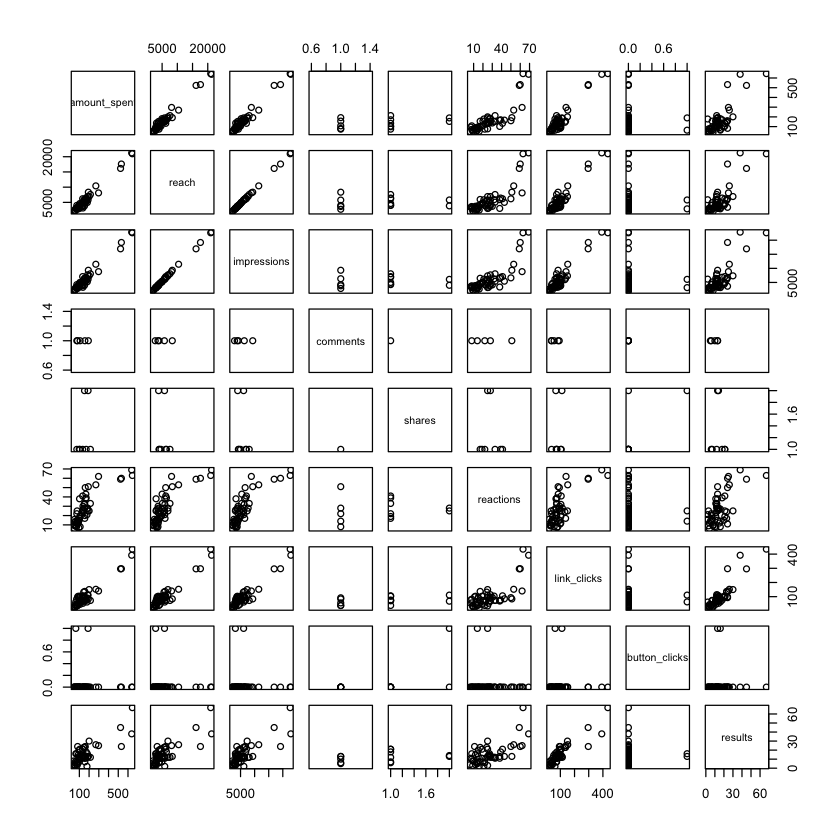

In [172]:
pairs(~amount_spent+reach+impressions+comments+shares+reactions+link_clicks+button_clicks+results,data=raw_lead_gen_ads)

In [173]:
# Use the remove NA function to the raw lead gen ad table
raw_lead_gen_ads <- raw_lead_gen_ads %>% mutate(comments2 = na.zero(raw_lead_gen_ads$comments))
raw_lead_gen_ads <- raw_lead_gen_ads %>% mutate(reactions2 = na.zero(raw_lead_gen_ads$reactions))
raw_lead_gen_ads <- raw_lead_gen_ads %>% mutate(shares2 = na.zero(raw_lead_gen_ads$shares))
head(raw_lead_gen_ads)

reporting_start,reporting_end,campaign_name,delivery,results,result_indicator,reach,impressions,cost_per_result,amount_spent,⋯,frequency,link_clicks,button_clicks,comments,reactions,shares,engagement,comments2,reactions2,shares2
2018-02-04,2018-02-04,20180204-20180204 Lead Gen OO,active,7,actions:leadgen.other,4115,4431,14.055714,98.39,⋯,1.076792,71,0,NA,17,1,89,0,17,1
2018-02-02,2018-02-02,20180129-20180202 Lead Gen OO,recently_completed,11,actions:leadgen.other,3401,3527,8.612727,94.74,⋯,1.037048,76,0,NA,7,NA,84,0,7,0
2018-02-01,2018-02-01,20180129-20180202 Lead Gen OO,recently_completed,30,actions:leadgen.other,6920,7340,6.680667,200.42,⋯,1.060694,150,0,NA,25,NA,176,0,25,0
2018-01-31,2018-01-31,20180129-20180202 Lead Gen OO,recently_completed,23,actions:leadgen.other,5958,6482,6.763043,155.55,⋯,1.087949,137,0,NA,17,NA,158,0,17,0
2018-01-30,2018-01-30,20180129-20180202 Lead Gen OO,recently_completed,23,actions:leadgen.other,5614,5990,6.279130,144.42,⋯,1.066975,132,0,NA,24,NA,161,0,24,0
2018-01-29,2018-01-29,20180129-20180202 Lead Gen OO,recently_completed,21,actions:leadgen.other,4626,4986,4.993333,104.86,⋯,1.077821,103,0,NA,19,1,123,0,19,1


In [174]:
# Lead gen correlations with impressions
cor(raw_lead_gen_ads$impressions, raw_lead_gen_ads$comments2)
# -0.0535410426738639
cor(raw_lead_gen_ads$impressions, raw_lead_gen_ads$shares2)
# -0.0423561646393274
cor(raw_lead_gen_ads$impressions, raw_lead_gen_ads$reactions2)
# 0.827360645685599
cor(raw_lead_gen_ads$impressions, raw_lead_gen_ads$link_clicks)
# 0.951608337338258
cor(raw_lead_gen_ads$impressions, raw_lead_gen_ads$button_clicks)
# -0.0622104776569434

[1] -0.05354104

[1] -0.04235616

[1] 0.8273606

[1] 0.9516083

[1] -0.06221048

In [175]:
# Lead gen correlations with amount spent
cor(raw_lead_gen_ads$amount_spent, raw_lead_gen_ads$comments2)
# -0.0969272377924087
cor(raw_lead_gen_ads$amount_spent, raw_lead_gen_ads$shares2)
# -0.0422718140261657
cor(raw_lead_gen_ads$amount_spent, raw_lead_gen_ads$reactions2)
# 0.827476948551598
cor(raw_lead_gen_ads$amount_spent, raw_lead_gen_ads$link_clicks)
# 0.951178990714568
cor(raw_lead_gen_ads$amount_spent, raw_lead_gen_ads$button_clicks)
# 0.0532408385322584

[1] -0.09692724

[1] -0.04227181

[1] 0.8274769

[1] 0.951179

[1] -0.05324084

In [176]:
# Lead gen correlations with reach
cor(raw_lead_gen_ads$reach, raw_lead_gen_ads$comments2)
# -0.0575127358138451
cor(raw_lead_gen_ads$reach, raw_lead_gen_ads$shares2)
# -0.0397334665007006
cor(raw_lead_gen_ads$reach, raw_lead_gen_ads$reactions2)
# 0.821468366428066
cor(raw_lead_gen_ads$reach, raw_lead_gen_ads$link_clicks)
# 0.953418691274975
cor(raw_lead_gen_ads$reach, raw_lead_gen_ads$button_clicks)
# -0.0614062563563131

[1] -0.05751274

[1] -0.03973347

[1] 0.8214684

[1] 0.9534187

[1] -0.06140626

#### For lead gen ads, impressions/spend/reach seem most positively correlated to link clicks.

## Preliminary Statements

1. For lead generation ad types, impressions/spend/reach seem most positively correlated to link clicks.  The coefficient is over 0.95 in all cases.
2. For retargeting ads, correlations are strong again, but for a different result.  Impressions/spend/reach seem most 
positively correlated to link clicks for retargeting ad types.
3. When it comes to the post ads, correlations seem weaker than traffic ads.  Impressions/spend/reach seem most positively correlated to shares for post ad types.
4. For traffic ads, there appears to be a stronger correlation between spend/reach/impressions and reactions.

The next questions are validating these with further statistical analysis, and why might these correlations be valid?